##Importar las librerías


In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch import nn
from torch.autograd import Variable # Para convertir nuestras varaibles a tensores

#Cargar los datos

In [89]:
data = pd.read_csv("MLP_regresion.xls")

##Preparar los datos para entrenar la red neuronal artificial(*ANN*)

In [90]:
X = Variable(torch.from_numpy(data['X'].values)).float()
X = torch.unsqueeze(X,dim=1)
Y = Variable(torch.from_numpy(data['Y'].values)).float()
Y = torch.unsqueeze(Y,dim=1)

#**Modelo 1**
ANN con 4 capas de 56, 28, 14 y 7 neuronas sucecivamente y con la funcion de activacion ReLU.

##Crear la ANN

In [108]:

model = nn.Sequential(
                nn.Linear(1, 56),
                nn.ReLU(),
                nn.Linear(56, 28),
                nn.ReLU(),
                nn.Linear(28, 14),
                nn.ReLU(),
                nn.Linear(14, 7),
                nn.ReLU(),
                nn.Linear(7, 1),
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=56, bias=True)
  (1): ReLU()
  (2): Linear(in_features=56, out_features=28, bias=True)
  (3): ReLU()
  (4): Linear(in_features=28, out_features=14, bias=True)
  (5): ReLU()
  (6): Linear(in_features=14, out_features=7, bias=True)
  (7): ReLU()
  (8): Linear(in_features=7, out_features=1, bias=True)
)

In [109]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = torch.nn.MSELoss()

##Entrenar la ANN

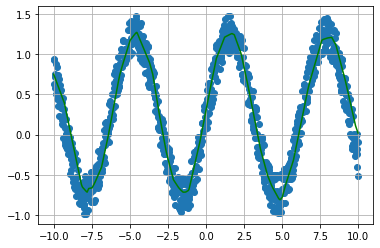

In [110]:
n_epoch = 10000
loss_list = np.zeros(n_epoch)

for epoch in range(n_epoch):
    Y_pred = model(X)  

    loss = criterion(Y_pred, Y)
    loss_list[epoch]=loss.item()

    optimizer.zero_grad()   
    loss.backward()
    optimizer.step()
    
plt.scatter(X.data.numpy(), Y.data.numpy())
plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
plt.grid()
plt.show()

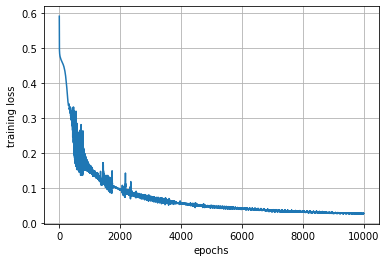

In [111]:
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

In [112]:
print(loss_list[-1])

0.02803015150129795


##Análisis de resultados modelo 1


1.   Se observa un ajuste bastante preciso al los datos, sobre todo en la parte central.
2.   Se obtiene un valor de loss bastante pequeño lo que nos permite en cierto modo valorar el ajuste como optimo.
3.   La forma observada es muy semejante a una funcion sinosoidal como seria de esperar, sin embargo en este caso se presentan "desviaciones" que se ajustan mejor a los datos (*Probablemente se trata de sobreentrenamiento*). 



#**Modelo 2**
ANN con 2 capas de 14 y 7 neuronas sucecivamente y con la funcion de activacion ReLU.

##Crear la ANN


In [105]:
model1 = nn.Sequential(
                nn.Linear(1, 14),
                nn.ReLU(),
                nn.Linear(14, 7),
                nn.ReLU(),
                nn.Linear(7, 1),
                )
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.2)
#criterion = torch.nn.MSELoss()

##Entrenar la ANN

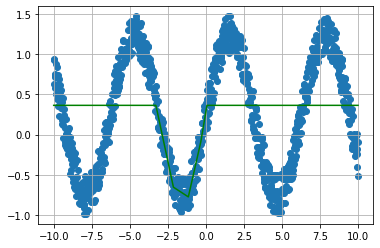

In [106]:
n_epoch = 10000
loss_list1 = np.zeros(n_epoch)

for epoch in range(n_epoch):
    Y_pred = model1(X)  

    loss1 = criterion(Y_pred, Y)
    loss_list1[epoch]=loss1.item()

    optimizer1.zero_grad()   
    loss1.backward()
    optimizer1.step()
    
plt.scatter(X.data.numpy(), Y.data.numpy())
plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
plt.grid()
plt.show()

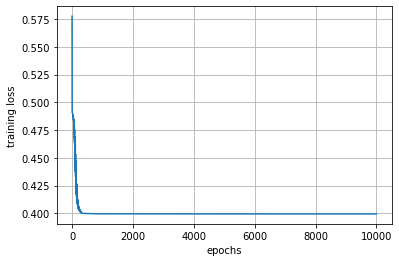

In [107]:
plt.plot(loss_list1)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

##Análisis de resultados modelo 2


1.   Se observa un ajuste relativamente preciso unicamente en una parte de los datos. Esto es muy malo a comparacion del modelo 1 para el cual se obtuvo un buen ajuste para todos los datos.
2.   Se obtiene un valor de loss alto que muestra una tendencia a mantenerse fijo sin importar el numero de epochs que se entrene el modelo.
3.   Con respecto a la forma lo poco que se observa es que en la parte donde el modelo parece mejor ajustarse a los datos se tienen diferencias con respecto a la sinosoidal espera que no pueden ser asociados a los datos sino más bien como consecuencia de limitaciones  en cuanto a la forma que podria tomar el modelo.

#En general
##El mejor modelo es por mucho el primero


1.   Muestra un mejor ajuste a los datos
2.   El valor de loss es mucho menor

Esto es consuecuencia de su mayor numero de capas y en relacion mayor numero de neuronas lo cual se ajusta mejor la situacion con la que se esta trabajando.

